### 최적화 (optimization)

f(w) = eTe 

모수 w가 입력되었을 때 f 함수를 거쳐서 나온 eTe 오차의 크기이다.
이 오차의 크기를 최소한 작게 하는 것이 최적화이다.



+ [ 최적화 문제 ]

        최적화 문제는 함수  f 의 값을 최대화 혹은 최소화하는 변수  x 의 값  x∗ 를 찾는 것이다.

        x∗=argminxf(x)(최소화의 경우)

        즉, f 함수를 최소로 하는 x값을 x*라고 한다

        이 값  x∗ 를 최적화 문제의 해(solution)라고 한다.


+ 최소화하고자 하는 함수  

        f(x) 를 목적함수(objective function), 비용함수(cost function) 또는 손실함수(loss function) 등으로 부른다.
        
        

[참고] 최적화 

데이타 사이언스 스쿨

https://datascienceschool.net/view-notebook/4642b9f187784444b8f3a8309c583007/

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def f1(x):
    return (x - 2) ** 2 + 2

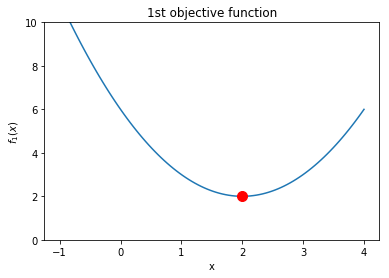

In [7]:
xx = np.linspace(-1, 4, 100)  # -1부터 4까지의 수 중에서 100개 샘플
plt.plot(xx, f1(xx))

plt.ylim(0, 10)
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("1st objective function")

# [분석] 이 함수의 최소값은 2가 된다
plt.plot(2, 2, 'ro', markersize=10)

### 그리드 서치와 수치적 최적화


    + 최적화문제 : 목적함수의 값을 가장 최소로 하는 x의 위치를 찾는 것이다
    + 최적화 문제를 푸는 가장 간단한 방법
        - x의 값을 여러번 넣어보고 그 중에서 가장 작은 값을 선택하는 방법
        - 위의 방법을 그리드 서치(grid search)라고 한다
        - 그러나 그리드 서치 이용시 목적함수의 값(예측 오차)을 찾기 위한 계산량이 많다
        
    + 목적함수의 계산량을 줄이기 위한 방법
        - 수치적 최적화(numerical optimization)방법
        - 반복적인 시행 착오(trial and error)에 의해 최적화 필요조건을 만족하는 x*를 찾는다
        - 함수의 위치가 최적점이 될 때까지 가능한 한 적은 회수로 x의 위치를 옮기는 방법
        
       
   * 수치적 최적화 방법에 필요한 2가지 알고리즘
     1. 어떤 위치 x를 시도한 뒤에 다음번에 시도할 위치 x를 찾는 알고리즘
     2. 현재 위치 x가 최저점인지를 판단할 수 있는 알고리즘
     

### 기울기 필요 조건

- 모든 최소점은 기울기가 0이기 때문에 최소점이 되기 위해서는 기울기가 0이여야 한다.
  ( 그러나 기울기가 0이라고 모두 최소점이 아닐 수 있다 )
- 기울기를 나타내는 함수를 g 기호로 표현한다 (g:Gradient)


### SGD (Steepest Gradient Descent ) 방법

+ 현재 위치 x에서의 기울기 값 g(x)만을 이용해서 다음에 시도할 위치를 알아내는 방법
 ( 수치적 최적화 알고리즘의 1번 알고리즘이라고 할 수 있다 )
+ [예] U자모양의 그래프인 경우 g(x)<0이라면 최저점은 현재 x보다 큰 값이고
g(x)>0이라면 현재 x보다 작은 값이 최저점이기에 이런식으로 하여 g(x)=0인 최저점을 찾는 것이다


[참고] 데이타 사이언스 스쿨

https://datascienceschool.net/view-notebook/4642b9f187784444b8f3a8309c583007/

SGD(Steepest Gradient Descent)방법은 최급강하법이라고도 하며 단순히 현재 시도하고 위치  xk 에서의 기울기 값  g(xk)  만을 이용하여 다음번에 시도할 위치  xk+1 를 결정하는 방법이다.

xk+1=xk−μ∇f(xk)=xk−μg(xk)
 
만약 현재 위치  xk 에서 기울기가 음수이면 즉 곡면이 아래로 향하면  g(xk)<0 이므로 앞으로 진행하고 현재 위치  xk 에서 기울기가 양수이면  g(xk)>0 이므로 뒤로 진행하게 되어 점점 낮은 위치로 옮겨간다.

xk 가 일단 최적 점에 도달하였을 때는  g(xk)=0 이 되므로 더 이상 위치를 옮기지 않는다.

이 때 위치를 옮기는 거리를 결정하는 비례상수  μ 를 스텝 사이즈(step size)라고 한다.
이 스텝 사이즈는 결정해야 하는데, 너무 작은 값이면 작업량이 많고 너무 크게 잡으면 최저점을 못 찾을 수도 있다

In [8]:
def f1d(x):
    """derivative of f1(x)"""
    return 2 * (x - 2.0)

1차 시도: x_1 = 0.00, g_1 = -4.00
2차 시도: x_2 = 1.60, g_2 = -0.80
3차 시도: x_3 = 1.92, g_3 = -0.16


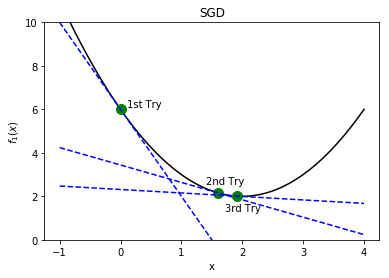

In [10]:
xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')

# step size : 이것을 적합한 값으로 설정하는 것이 중요!!
mu = 0.4

# k = 0 : k는 위치 시도값, 0부터 시작한다.
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "1st Try")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("1차 시도: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

# k = 1
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) + 0.4, "2nd Try")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("2차 시도: x_2 = {:.2f}, g_2 = {:.2f}".format(x, f1d(x)))

# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) - 0.7, "3rd Try")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("3차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("SGD")
plt.ylim(0, 10)
plt.show()

# [결과] 기울기가 점점 0에 가까워지는 것을 알수 있다